In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/PPW/Tugas/processing_DataDetik.csv')

In [3]:
df.isnull().sum()

Unnamed: 0    0
Judul         0
Artikel       0
Category      0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df = df.drop_duplicates(subset=['Judul', 'Artikel'])
df

,Unnamed: 0,Judul,Artikel,Category
0,0,Pengertian Konsep Diferensiasi Area Geografi d...,Gejala dan permasalahan geografi di setiap dae...,Edu
1,1,Mahasiswa FT UI Juara 1 Balap Mobil Nasional d...,Berprestasi tak harus di bidang akademik. Sepe...,Edu
2,2,Keren! Robot Tangan Ini Mirip Seperti Organ Ma...,Ilmuwan telah memanfaatkan printing 3D untuk m...,Edu
3,3,Mengapa Makam Mesir Kuno Ini Diberi Mantra Pel...,"Selama penggalian di Abusir, antara Giza dan S...",Edu
4,4,"Cara Menyelamatkan Diri Saat Kapal Tenggelam, ...","Ketika sedang berada di kapal di laut, tentuny...",Edu
...,...,...,...,...
1718,1718,5 Bintang Sepakbola Top Dunia Ini Ternyata Dul...,Banyak pemain sepakbola top dunia ternyata men...,Sport
1719,1719,Ducati Enggak Takut Rahasianya Akan Dibawa Mar...,Marc Marquez diyakini akan menyeberang ke Gres...,Sport
1720,1720,16 Poin Evaluasi PBSI Usai Gagal di Asian Game...,PP PBSI melakukan evaluasi menyusul kegagalan ...,Sport
1721,1721,Penggemar Ducati Indonesia Antusias Jumpa Bagn...,Ketua MPR RI sekaligus Ketua Umum Ikatan Motor...,Sport


In [6]:
import re, string

# Text Cleaning
def cleaning(text):
    # Menghapus tag HTML
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Mengubah seluruh teks menjadi huruf kecil
    text = text.lower()

    # Menghapus spasi pada teks
    text = text.strip()

    # Menghapus Tanda Baca, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub("â½ïgoal", "", text)
    text = re.sub("SCROLL TO CONTINUE WITH CONTENT", "", text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)


    # Menghapus Nomor
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Mengubah text yang berisi 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

In [7]:
df['Artikel'] = df['Artikel'].apply(lambda x: cleaning(x))

In [8]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [9]:
df['isi_tokens'] = df['Artikel'].apply(lambda x: word_tokenize(x))
df[["Artikel", "isi_tokens"]].head()

,Artikel,isi_tokens
0,gejala dan permasalahan geografi di setiap dae...,"[gejala, dan, permasalahan, geografi, di, seti..."
1,berprestasi tak harus di bidang akademik seper...,"[berprestasi, tak, harus, di, bidang, akademik..."
2,ilmuwan telah memanfaatkan printing d untuk me...,"[ilmuwan, telah, memanfaatkan, printing, d, un..."
3,selama penggalian di abusir antara giza dan sa...,"[selama, penggalian, di, abusir, antara, giza,..."
4,ketika sedang berada di kapal di laut tentunya...,"[ketika, sedang, berada, di, kapal, di, laut, ..."


In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian')))
df['isi_tokens'] = df['isi_tokens'].apply(lambda x: [w for w in x if not w in stop_words])

In [12]:
df['Artikel'] = df['isi_tokens'].apply(lambda tokens: ' '.join(tokens))

In [13]:
df.head()

,Unnamed: 0,Judul,Artikel,Category,isi_tokens
0,0,Pengertian Konsep Diferensiasi Area Geografi d...,gejala permasalahan geografi daerah berbeda be...,Edu,"[gejala, permasalahan, geografi, daerah, berbe..."
1,1,Mahasiswa FT UI Juara 1 Balap Mobil Nasional d...,berprestasi bidang akademik muhammad aqsha auf...,Edu,"[berprestasi, bidang, akademik, muhammad, aqsh..."
2,2,Keren! Robot Tangan Ini Mirip Seperti Organ Ma...,ilmuwan memanfaatkan printing d robot tangan f...,Edu,"[ilmuwan, memanfaatkan, printing, d, robot, ta..."
3,3,Mengapa Makam Mesir Kuno Ini Diberi Mantra Pel...,penggalian abusir giza saqqara arkeolog czech ...,Edu,"[penggalian, abusir, giza, saqqara, arkeolog, ..."
4,4,"Cara Menyelamatkan Diri Saat Kapal Tenggelam, ...",kapal laut mengharapkan kondisi kapal tenggela...,Edu,"[kapal, laut, mengharapkan, kondisi, kapal, te..."


In [15]:
df['Artikel'][0]

'gejala permasalahan geografi daerah berbeda beda daerah memiliki faktor ciri khasnya wilayah cocok ditanami vegetasi ditanami vegetasi perbedaan wilayah ilmu geografi dikaji salah konsep dasar konsep diferensiasi area konsep dasar ilmu geografi lokasi jarak morfologi keterjangkauan pola aglomerasi nilai kegunaan interdependensi keterkaitan ruang diferensiasi area scroll to continue with content kesempatan kali mari membahas konsep diferensiasi area beserta contohnya yuk simak artikel konsep diferensiasi area mengemukakan fenomena muka bumi memiliki perbedaan ciri khas dikutip buku explore geografi jilid sma ma kelas x karya dra sri wiyanti mpd dkk konsep diferensiasi area berhubungan perbedaan fenomena wilayah pengertian konsep diferensiasi area merujuk keunikan karakteristik wilayah dibandingkan wilayah mengutip e modul pembelajaran sma geografi kelas x karya fitri sekar lestari diferensiasi area konsep membandingkan wilayah karakteristik khasnya konsep diferensiasi area mempertegas 

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda x: x.split())
X = vectorizer.fit_transform([df['Artikel'][0]])

co_occurrence_matrix = (X.T * X)
co_occurrence_matrix.setdiag(0)

co_occurrence_df = pd.DataFrame(co_occurrence_matrix.toarray(), columns=vectorizer.get_feature_names_out(),index=vectorizer.get_feature_names_out())
co_occurrence_df

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,aglomerasi,ahli,air,alam,alternatif,ampat,area,artikel,barang,beda,...,tropis,tundra,unik,utama,vegetasi,wilayah,with,wiyanti,x,yuk
aglomerasi,0,1,2,3,1,1,10,1,1,4,...,1,1,1,1,2,10,1,1,2,1
ahli,1,0,2,3,1,1,10,1,1,4,...,1,1,1,1,2,10,1,1,2,1
air,2,2,0,6,2,2,20,2,2,8,...,2,2,2,2,4,20,2,2,4,2
alam,3,3,6,0,3,3,30,3,3,12,...,3,3,3,3,6,30,3,3,6,3
alternatif,1,1,2,3,0,1,10,1,1,4,...,1,1,1,1,2,10,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wilayah,10,10,20,30,10,10,100,10,10,40,...,10,10,10,10,20,0,10,10,20,10
with,1,1,2,3,1,1,10,1,1,4,...,1,1,1,1,2,10,0,1,2,1
wiyanti,1,1,2,3,1,1,10,1,1,4,...,1,1,1,1,2,10,1,0,2,1
x,2,2,4,6,2,2,20,2,2,8,...,2,2,2,2,4,20,2,2,0,2


In [18]:
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
G = nx.DiGraph()
for idx, row in co_occurrence_df.iterrows():
    for col in co_occurrence_df.columns:
        weight = co_occurrence_df.loc[idx, col]
        if weight > 50 and idx != col:
            G.add_edge(idx, col, weight=weight)

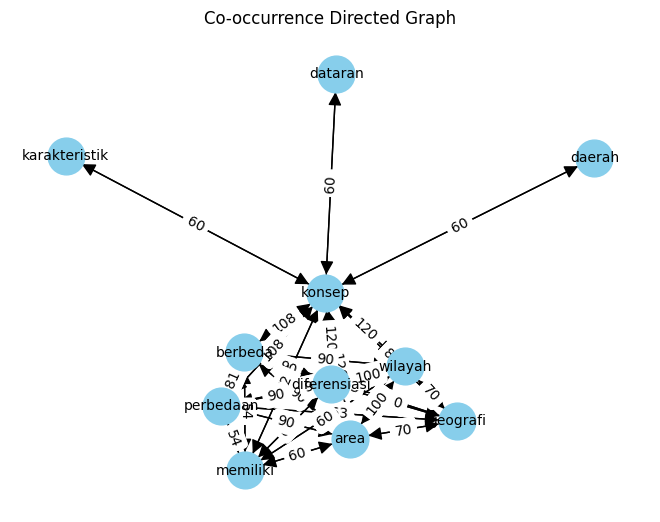

In [19]:
# Menampilkan graf
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Co-occurrence Directed Graph")
plt.show()

In [20]:
closeness_centrality = nx.closeness_centrality(G)
print("Closeness Centrality:")
for node, closeness in sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {closeness}")

Closeness Centrality:
konsep: 1.0
area: 0.7692307692307693
berbeda: 0.7692307692307693
diferensiasi: 0.7692307692307693
perbedaan: 0.7692307692307693
wilayah: 0.7692307692307693
geografi: 0.7142857142857143
memiliki: 0.7142857142857143
daerah: 0.5263157894736842
dataran: 0.5263157894736842
karakteristik: 0.5263157894736842


In [21]:
pagerank = nx.pagerank(G)
print("\nPageRank:")
for node, rank in sorted(pagerank.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {rank}")


PageRank:
konsep: 0.19532343182358536
area: 0.11868569773090287
diferensiasi: 0.11868569773090287
wilayah: 0.11868569773090286
perbedaan: 0.10950351257748175
berbeda: 0.10950351257748174
geografi: 0.08291645650732528
memiliki: 0.07301930038290218
daerah: 0.02455889764617175
dataran: 0.02455889764617175
karakteristik: 0.02455889764617175


In [22]:
df['Artikel'][0]

'gejala permasalahan geografi daerah berbeda beda daerah memiliki faktor ciri khasnya wilayah cocok ditanami vegetasi ditanami vegetasi perbedaan wilayah ilmu geografi dikaji salah konsep dasar konsep diferensiasi area konsep dasar ilmu geografi lokasi jarak morfologi keterjangkauan pola aglomerasi nilai kegunaan interdependensi keterkaitan ruang diferensiasi area scroll to continue with content kesempatan kali mari membahas konsep diferensiasi area beserta contohnya yuk simak artikel konsep diferensiasi area mengemukakan fenomena muka bumi memiliki perbedaan ciri khas dikutip buku explore geografi jilid sma ma kelas x karya dra sri wiyanti mpd dkk konsep diferensiasi area berhubungan perbedaan fenomena wilayah pengertian konsep diferensiasi area merujuk keunikan karakteristik wilayah dibandingkan wilayah mengutip e modul pembelajaran sma geografi kelas x karya fitri sekar lestari diferensiasi area konsep membandingkan wilayah karakteristik khasnya konsep diferensiasi area mempertegas 

In [23]:
ranking_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Kata Kunci dari berita diatas menggunakan closeness berdasarkan urutan (Rank):")
for i, (node, closeness) in enumerate(ranking_closeness, 1):
    print(f"Rank {i}: {node} nilai closeness {closeness}")

Kata Kunci dari berita diatas menggunakan closeness berdasarkan urutan (Rank):
Rank 1: konsep nilai closeness 1.0
Rank 2: area nilai closeness 0.7692307692307693
Rank 3: berbeda nilai closeness 0.7692307692307693
Rank 4: diferensiasi nilai closeness 0.7692307692307693
Rank 5: perbedaan nilai closeness 0.7692307692307693
Rank 6: wilayah nilai closeness 0.7692307692307693
Rank 7: geografi nilai closeness 0.7142857142857143
Rank 8: memiliki nilai closeness 0.7142857142857143
Rank 9: daerah nilai closeness 0.5263157894736842
Rank 10: dataran nilai closeness 0.5263157894736842


In [24]:
ranking_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
print("Kata Kunci dari berita diatas menggunakan pagerank berdasarkan urutan (Rank):")
for i, (node, pagerank) in enumerate(ranking_pagerank, 1):
    print(f"Rank {i}: {node} nilai Pagerank {pagerank}")

Kata Kunci dari berita diatas menggunakan pagerank berdasarkan urutan (Rank):
Rank 1: konsep nilai Pagerank 0.19532343182358536
Rank 2: area nilai Pagerank 0.11868569773090287
Rank 3: diferensiasi nilai Pagerank 0.11868569773090287
Rank 4: wilayah nilai Pagerank 0.11868569773090286
Rank 5: perbedaan nilai Pagerank 0.10950351257748175
Rank 6: berbeda nilai Pagerank 0.10950351257748174
Rank 7: geografi nilai Pagerank 0.08291645650732528
Rank 8: memiliki nilai Pagerank 0.07301930038290218
Rank 9: daerah nilai Pagerank 0.02455889764617175
Rank 10: dataran nilai Pagerank 0.02455889764617175
